<a href="https://colab.research.google.com/github/chieuanh2910/PestRecognition/blob/main/Agricultural_pest_recognition_with_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agricultural pest recognition with image data**

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

This report aims to provide a comprehensive approach to leverage machine learning for agricultural pest detection using a dataset comprising 2,479 real images of five distinct types of agricultural pests: Ants, Bees, Grasshoppers, Moths, and Wasps. The primary objectives includes dataset exploration, development and evaluation of two deep learning models with different architectures, comparison their performance, results interpretation, and discussion of potential strategies for enhancing the models in real world.

The structure of the report includes Data Preprocessing, Predictive Modelling, and Experiments Report.

**Data Preprocessing**

Initial data exploration involves visualizing sample images to gain insights into the variety and characteristics of 5 classes of pests, which can inform model development. Then, the dataset will be split into 70% for training and 30% for testing.

**Predictive Modelling**

Two deep learning models - Convolutional Neural Networks (CNNs) - with different architectures will be developed for pest classification.

Model 1: 1 Convolution and 1 Pooling layer; 1 Flattening and 1 Dense layer; and 1 Output layer

Model 2: 2 Convolution and 2 Pooling layers; 1 Flattening and 1 Dense layer; and 1 Output layer


The developed models will be evaluted through metrics such accuracy, kappa, precision, recall, F1-score. The evaluation will help assess each model's effectiveness in accurately classifying the different types of agricultural pests.

**Experiments Report**

The results of model evaluation will be thoroughly analyzed of each iteration with different hyperparameters. This section will help identify true impact factors of each model, and therefore give more insights on how to improve their performance capability. Thus, potential approaches for improving the model performance will be discussed. These strategies include architecture adjustment, parameters fine-tuning, and data collection.

In summary, this project aims to apply CNN model to to address the critical issue of agricultural pest detection. By developing and evaluating deep learning models on a diverse dataset, the ultimate goal is contribute to more accurate and efficient pest management in agricultural settings, reducing crop damage and increasing agricultural productivity.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

The dataset includes 2479 images of  5 different classes of pests, namely ants, bees, grasshopper, moths, and wasps. In terms of files underer each class:


*   Total number of files under ants folder are: 499
*   Total number of files under bees folder are: 500
*   Total number of files under grasshoper folder are: 485
*   Total number of files under moth folder are: 497
*   Total number of files under wasp folder are: 498

All of the files will be joined into a single dataser before spliting into 70% for training and 30%  for testing datasets. The image dataset will also be converted to NumPy for lesser memeory consumption.

The images are set up with the size of 100x100 pixels and 3 color channels. There are 5 classes: ants, bees, grasshopper, moths, and wasps being mapped to integers (0: ants, 1: bees, 2: grasshopper, 3: moths, 4:wasps). The pixel values are normalized by dividing them by 255. This scales the pixel values to the range [0, 1], which will help the model converge faster during training.

The output of the training matrix shape is 1732 samples, each of which is a 100x100 pixel image with 3 color channels (RGB). The output of the Testing matrix shape includes 743 samples, each of which is a 100x100 pixel image with 3 color channels.

Finally, a sample of 20 images will be visualized to see the the pest types.

In [ ]:
#Apply html styling to tables and images
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

In [ ]:
#Import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.losses import categorical_crossentropy

tf.config.list_physical_devices('GPU')

[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading image data

import os

# Set the paths to the folders containing the image files
ants_path = '/content/drive/MyDrive/A2_Datasets/Part2_agricultural_pests/ants'
bees_path = '/content/drive/MyDrive/A2_Datasets/Part2_agricultural_pests/bees'
grasshopper_path = '/content/drive/MyDrive/A2_Datasets/Part2_agricultural_pests/grasshopper'
moth_path = '/content/drive/MyDrive/A2_Datasets/Part2_agricultural_pests/moth'
wasp_path = '/content/drive/MyDrive/A2_Datasets/Part2_agricultural_pests/wasp'


# get a list of all files in the folder
ants_file_list = os.listdir(ants_path)
bees_file_list = os.listdir(bees_path)
grasshopper_file_list = os.listdir(grasshopper_path)
moth_file_list = os.listdir(moth_path)
wasp_file_list = os.listdir(wasp_path)


# print the total number of files
print(f'Total number of files under ants folder are: {len(ants_file_list)}')
print(f'Total number of files under bees folder are: {len(bees_file_list)}')
print(f'Total number of files under grasshoper folder are: {len(grasshopper_file_list)}')
print(f'Total number of files under moth folder are: {len(moth_file_list)}')
print(f'Total number of files under wasp folder are: {len(wasp_file_list)}')



Total number of files under ants folder are: 499
Total number of files under bees folder are: 500
Total number of files under grasshoper folder are: 485
Total number of files under moth folder are: 497
Total number of files under wasp folder are: 498


In [ ]:
#Join all files into a single dataset

import os
import tensorflow as tf

# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(ants_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(ants_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'ants'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(bees_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(bees_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'bees'
    # Add the image data and label to the data list
    data.append((img, label))

    # Iterate through the files in the third folder
for file in os.listdir(grasshopper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(grasshopper_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'grasshopper'
    # Add the image data and label to the data list
    data.append((img, label))

    # Iterate through the files in the fourth folder
for file in os.listdir(moth_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(moth_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'moth'
    # Add the image data and label to the data list
    data.append((img, label))

    # Iterate through the files in the fifth folder
for file in os.listdir(wasp_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(wasp_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'wasp'
    # Add the image data and label to the data list
    data.append((img, label))

In [ ]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
from keras.utils import to_categorical

img_rows, img_cols, channels = 100, 100, 3
num_classes = 5
class_names = ['ants', 'bees', 'grasshopper', 'moth', 'wasp']
category_map = {'ants': 0, 'bees': 1, 'grasshopper': 2, 'moth': 3, 'wasp': 4}

# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

Y_train = to_categorical(Y_train, num_classes =5)
Y_test = to_categorical(Y_test, num_classes=5)

# print the shape of the reshaped data
print("Training matrix shape", ', X_train: ', X_train.shape, ',Y_train: ', Y_train.shape)
print("Testing matrix shape", ', X_test: ',X_test.shape, ', Y_test: ', Y_test.shape)

Training matrix shape , X_train:  (1732, 100, 100, 3) ,Y_train:  (1732, 5)
Testing matrix shape , X_test:  (743, 100, 100, 3) , Y_test:  (743, 5)


In [ ]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

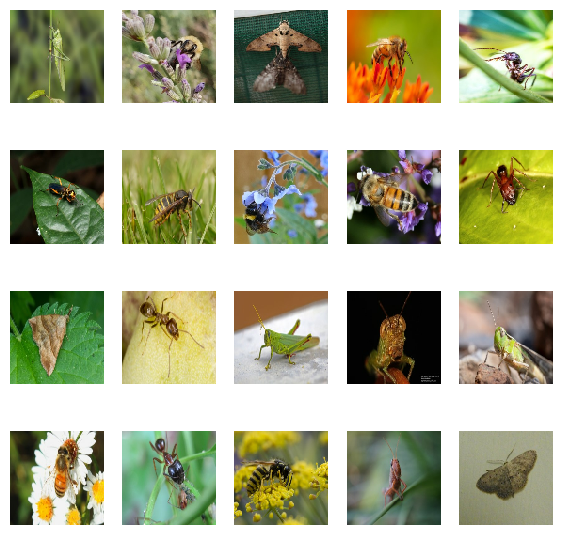

In [ ]:
plot_images(X_train[0:20], cols=5,figsize=[7,7])

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

<a id = "cell_model"></a>
## 3. Predictive Modelling

There are two models with different architecture in order to compare their performance (model 1 and model 2). The models will be tested with different hyperparameters such as optimizer, learning rate, and batches. A full list if experiment will be at Experiment Report section. Only the best model settings are presented at this section whih is Model 2.

After several iterations, it is found out that the optimizer Nadam with learning rate 0.001 shows the best performance for both models, and model 2 is slightly better than model 1. Thus, the evaluation will be disscussed with the setting of the model 2 only.


**MODEL 1**

This model includes 1 convolution layer, 1 pooling layer, 1 flattening layer, 1 dense layer, and 1 output layer.

*   Convolutional Layer (Conv2D): There are 32 kernels used in this layer with the size of 3x3. The activation function is Rectified Linear Unit (ReLU) which introduces non-linearity into the model.

*   Max-Pooling Layer (MaxPooling2D): This is a downsampling operation that reduces the spatial dimensions of the feature maps, helping to capture important patterns. In this layer, 2x2 pooling window will be used.

*   Flatten Layer: This layer flattens the output from the previous layers into a one-dimensional vector.
*   Dense Layer: There are 128 neurons used in this layer with the activation ReLU
*   Output Layer: This is the final fully connected layer with 5 classes (ants, bees, grasshopper, moths, wasps). The softmax activation function is used for classifications.


In [ ]:
def model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

**SUMMARY OF MODEL 1**

*   Layer 1 (Conv2D): 32 kernels to result in a feature maps of size 98x98 pixels with 896 trainable parameters
*   Layer 2(MaxPoolig2D): 32 kernels to result in a feature maps of size 49x49 pixels with 0 trainable parameters
*   Layer 3 (Dropout): 32 kernels to result in a feature maps of size 49x49 pixels with 0 trainable parameters
* Layer 4 (Flatten): This layer flattens the output from the previous layers into a one-dimensional vector
* Layer 5 (Dense): This dense layer has 128 neurons and 9834624 trainable parameters
* Layer 6 (Dropout): Another layer of dropout
* Layer 7 (Output): This is the final output layer with 5 neurons and 645 trainable parameters

Total parameters:9,836,165

Trainable parameters:9,836,165

Non-trainable parameters: 0

In [ ]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 128)               9834624   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

**MODEL 2**

This is a more complex model. It includes 2 convolution layers, 2 pooling layers, 1 dense layer, and 1 output layer. There are 3 layers of batch nomarlization to stabilizie the trainings.

*   First Convolutional Layer (Conv2D): There are 64 kernels used in this layer with the size of 3x3. The activation function is Rectified Linear Unit (ReLU) which introduces non-linearity into the model.
*   Second Convolutional Layer (Conv2D): There are 128 kernels used in this layer with the size of 3x3. The activation function is Rectified Linear Unit (ReLU).
*   First Max-Pooling Layer (MaxPooling2D): a 2x2 pooling window will be used.
*   Second Max-Pooling Layer (MaxPooling2D): another 2x2 pooling window will be used to further reduce the spatial dimensions
*   Flatten Layer: This layer flattens the output from the previous layers into a one-dimensional vector.
*   Dense Layer: There are 256 neurons used in this layer with the activation ReLU and L2 regularization
*   Output Layer: This is the final fully connected layer with 5 classes (ants, bees, grasshopper, moths, wasps). The softmax activation function is used for classifications.

In [ ]:
from keras.layers import BatchNormalization

def model_2():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    return model

**SUMMARY OF MODEL 2**

* Layer 1 (Conv2D): 64 kernels to result in a feature maps of size 98x98 pixels with 1792 trainable parameters
* Layer 2 (BatchNormalization): 64 kernels to result in a feature maps of size 98x98 pixels with 256 trainable parameters
* Layer 3 (MaxPooling2D): 64 kernels to result in a feature maps of size 49x49 pixels with 0 trainable parameters
* Layer 4 (Dropout): 64 kernels to result in a feature maps of size 49x49 pixels with 0 trainable parameters
* Layer 5 (Conv2D): 128 kernels to result in a feature maps of size 47x47 pixels with 73856 trainable parameters
* Layer 6 (BatchNormalization): 128 kernels to result in a feature maps of size 47x47 pixels with 512 trainable parameters
* Layer 7 (MaxPooling2D): 128 kernels to result in a feature maps of size 23x23 pixels with 0 trainable parameters
* Layer 8 (Dropout): Another dropout layer
* Layer 9 (Flatten): This layer flattens the output from the previous layers into a one-dimensional vector
* Layer 10 (Dense): This dense layer has 256 neurons and 1734528 trainable parameters
* Layer 11 (BatchNormalization): Another layer of batch normalization
* Layer 12 (Dropout): Another dropout layer
* Layer 13 (Output): This is the final output layer with 5 neurons and 1285 trainable parameters

Total parameters:17,413,253

Trainable parameters:17,412,357

Non-trainable parameters: 896



In [ ]:
model = model_2()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 47, 128)      5

In [ ]:
#Set random seed
random_seed = 29
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [ ]:
# Keras callbacks
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [ ]:
#Model complilation with Nadam as optimizer, learning rate = 0.001
model.compile(loss=categorical_crossentropy,
              optimizer=Nadam(learning_rate=0.001),
              metrics='accuracy')

In [ ]:
hist = model.fit(X_train, Y_train,
      batch_size=32,
      epochs=100,
      verbose=2,
      validation_data=(X_test, Y_test),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/100
55/55 - 14s - loss: 7.1440 - accuracy: 0.4013 - val_loss: 6.7750 - val_accuracy: 0.1992 - 14s/epoch - 257ms/step
Epoch 2/100
55/55 - 3s - loss: 5.1668 - accuracy: 0.5214 - val_loss: 5.9596 - val_accuracy: 0.2665 - 3s/epoch - 56ms/step
Epoch 3/100
55/55 - 3s - loss: 4.2792 - accuracy: 0.5779 - val_loss: 5.9056 - val_accuracy: 0.2894 - 3s/epoch - 57ms/step
Epoch 4/100
55/55 - 3s - loss: 3.8848 - accuracy: 0.6068 - val_loss: 6.6162 - val_accuracy: 0.2167 - 3s/epoch - 56ms/step
Epoch 5/100
55/55 - 3s - loss: 3.5445 - accuracy: 0.6328 - val_loss: 6.1358 - val_accuracy: 0.2046 - 3s/epoch - 54ms/step
Epoch 6/100
55/55 - 3s - loss: 3.5931 - accuracy: 0.6628 - val_loss: 5.4007 - val_accuracy: 0.2948 - 3s/epoch - 52ms/step
Epoch 7/100
55/55 - 3s - loss: 4.1173 - accuracy: 0.6726 - val_loss: 6.0734 - val_accuracy: 0.2382 - 3s/epoch - 52ms/step
Epoch 8/100
55/55 - 3s - loss: 4.4552 - accuracy: 0.7061 - val_loss: 5.7218 - val_accuracy: 0.3365 - 3s/epoch - 50ms/step
Epoch 9/100
55/55 - 3

### Model Evaluation

As stated before, the model evaluation will be discussed with model 2's settings.  

The model's accuracy is 0.642 with Kappa of 0.553, which means the model's prediction power being moderate with the true labels.

Based on the classification report, this model can predict moths and wasps quite good (precision of 0.79 and 0.74 respectively), but it struggles when it comes to bees. The recall of grasshoper is low at 0.39. This means that only 39% of the actual 'grasshopper' cases is correctly predicted.



In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 5.3968
Train accuracy: 0.9498 

Test loss: 6.2339
Test accuracy: 0.642


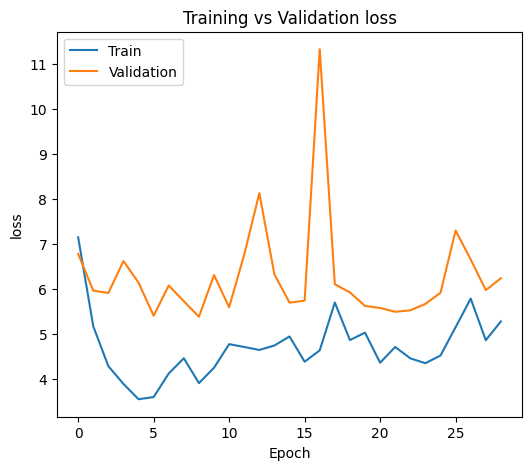

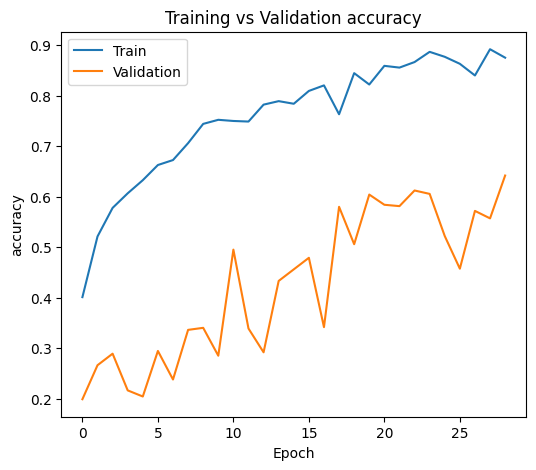

In [ ]:
plot_hist(pd.DataFrame(hist.history))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
Y_pred_continuous = np.round(Y_pred)

# Convert the predicted labels to multiclass format
Y_pred_multiclass = np.argmax(Y_pred, axis=1)
Y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(Y_test_multiclass, Y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(Y_test_multiclass, Y_pred_multiclass, target_names= class_names)

# Print the report
print("The result of the classification report is: \n ",report)

24/24 [==============================] - 0s 9ms/step
The result of Kappa is : 0.553
The result of the classification report is: 
                precision    recall  f1-score   support

        ants       0.59      0.60      0.59       141
        bees       0.52      0.71      0.60       140
 grasshopper       0.60      0.39      0.48       152
        moth       0.79      0.69      0.74       156
        wasp       0.74      0.81      0.77       154

    accuracy                           0.64       743
   macro avg       0.65      0.64      0.64       743
weighted avg       0.65      0.64      0.64       743



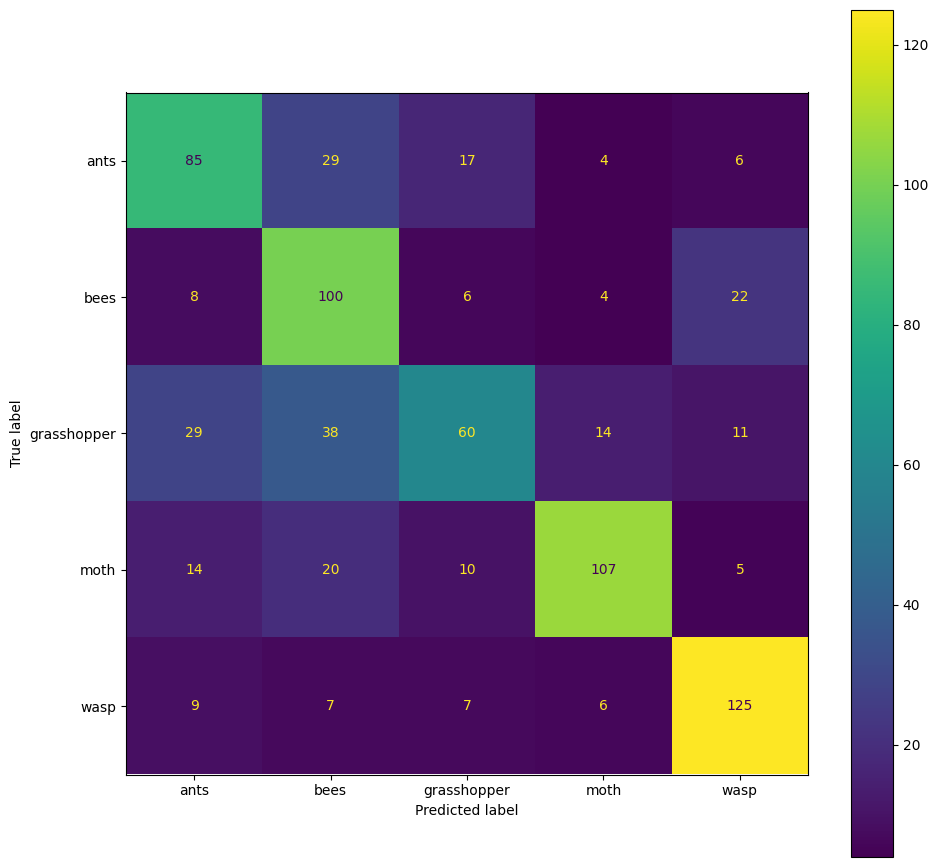

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    Y_test_multiclass,
    Y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

1/1 [==============================] - 0s 190ms/step


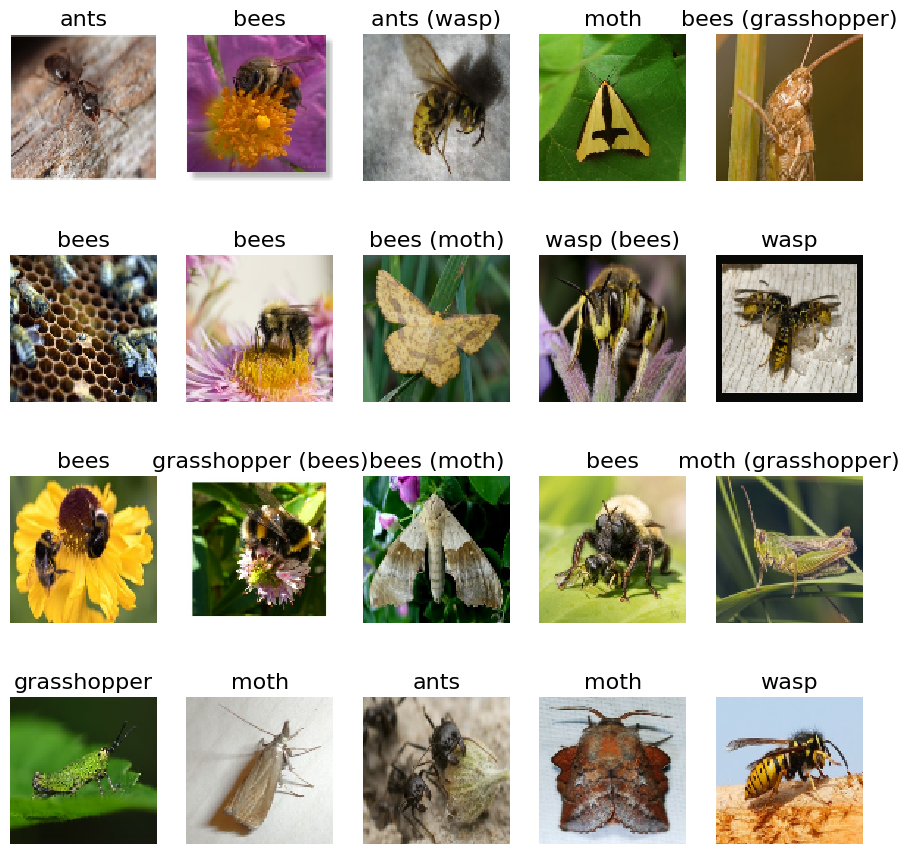

In [ ]:
img_range = range(20)
imgs = X_test[img_range]
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

<a id = "cell_report"></a>
## 4. Experiments Report

As stated in previous section, several iterations have been conducted on the two models with different parameters. The below table illustrates the results.

Model settings |Optimizer | Learning rate | Accuracy| Kappa
------|----------|---------------|---------|------
Model 1, 32 batches, 100 epochs| Nadam | 0.001 |0.6218|0.528
Model 1, 32 batches, 100 epochs|Nadam|0.002|0.5262|0.408
Model 1, 32 batches, 100 epochs|Nadam|0.005|0.498|0.372
Model 1, 64 batches, 100 epochs|Nadam|0.001|0.5734|0.468
Model 1, 32 batches, 100 epochs| RMSProp | 0.001 |0.5666|0.457
Model 2, 32 batches, 100 epochs| Nadam | 0.001 |0.642|0.553
Model 2, 32 batches, 100 epochs| Nadam | 0.002 |0.5612|0.447
Model 2, 32 batches, 100 epochs| Nadam | 0.005 |0.3594|0.189

It can be interpreted that smaller batch sizes clearly have better accuracy and kappa scores. For both models, batch sizes of 32 show higher accuracy an kappa scores. On the other hand, Nadam optimizer returns better performance for both models. However, if the learing rate is from 0.002 and above, kappa scores will drop significantly to less than random probablity of 0.5.

Based on the above observations, to optimize the model, it highly advisable to experiment with different architectures such as more layers with different nodes or activation functions. Optimizers with different learning rate should also be experimented. Batch size and tranining parameters tuning such as epoch numbers, early stopping criteria will affect the model's performancce. Lastly, more images should be feeded into the dataset. The images could be from multiple sources, seasons to help improve the robustness of the model, or they can be images without pests to prevent the model from false detections.     

The CNN model in this analysis will be useful for pest recognition tasks in argricutural industry. By having a well developed CNN model, pests could be detected in early stage to avoid severe infestation as pest are extremely quick to reproduce. Moreover, it can help to detect helpful insects which are not pests for better control measures without damaging the biological system of a crop.   
